#  Assignment 3- Kaggle :

# 1. ABSTRACT


#### Aim

* The main aim of this project is to create a summary notebook based on the best of kernel files and try to extend based on our understanding and research and improve our leaderboard rank. In this notebook, we will take an initial look at the Home Credit default risk machine learning competition.The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification task. The link to the competition can be found here https://www.kaggle.com/c/home-credit-default-risk.


##### Data

* The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population. Predicting whether or not a client will repay a loan or have difficulty is a critical business need, and Home Credit is hosting this competition on Kaggle to see what sort of models the machine learning community can develop to help them in this task.

There are 7 different sources of data:

#### application_train/application_test:

* The main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.

#### bureau: 

* data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.

#### bureau_balance: 

* monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.

#### previous_application: 

* previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.

#### POS_CASH_BALANCE: 

* monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.

#### credit_card_balance: 

monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.

#### installments_payment: 

* payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

HomeCredit_columns_description.csv file is provided as an example for expected submission file.



##### Data Diagram

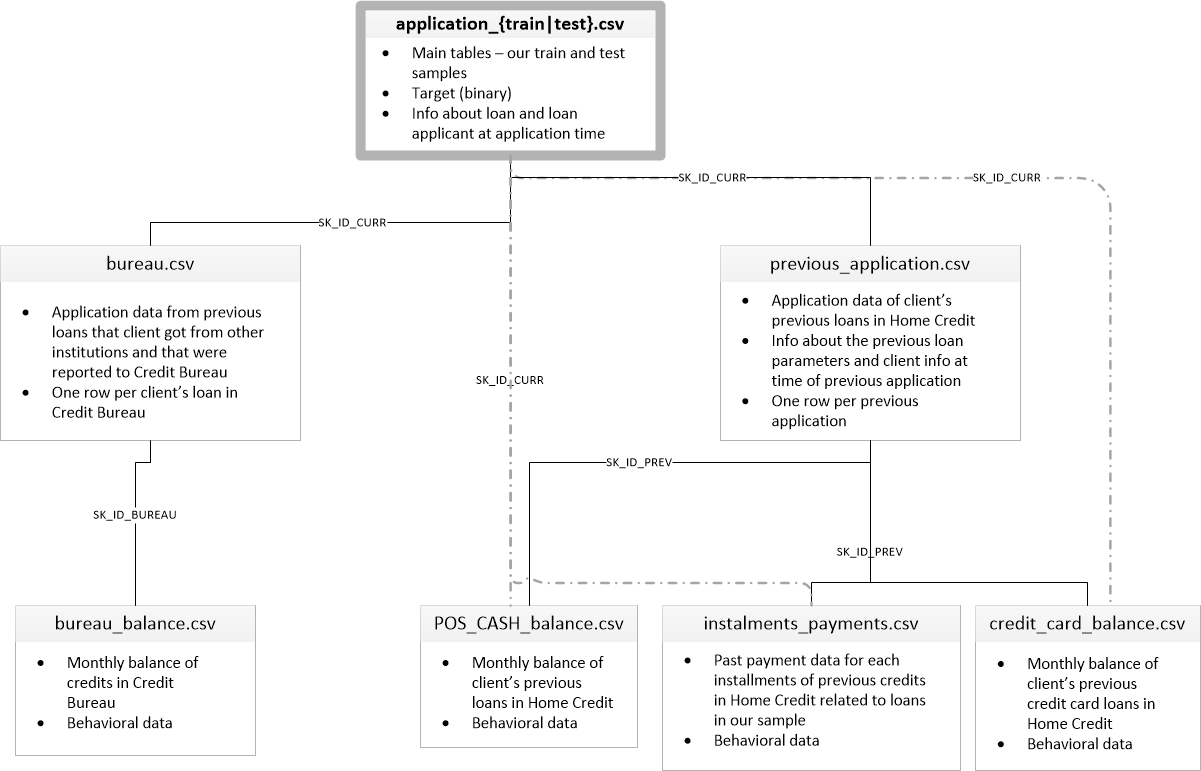

In [4]:
from IPython.display import Image
Image("home_credit.png")

#### Metric used: ROC AUC:

* In this case, it is a common classification metric known as the Receiver Operating Characteristic Area Under the Curve (ROC AUC, also sometimes called AUROC). The Area Under the Curve (AUC) explains itself by its name! It is simply the area under the ROC curve. (This is the integral of the curve.) This metric is between 0 and 1 with a better model scoring higher.
* A model that simply guesses at random will have an ROC AUC of 0.5.



#### Methods used:


1. Exploratory Data Analysis
2. Logistic Regression and Random forest
3. Hyperparameter tuning
4. Feature Engineering
5. LightGBM Classifier



#### Findings/Results

1. There are missing values in the data. It can be handled in feature engineering.
2. All the features and csv information needs to be handled to improve the leaderboard rank.
3. Few features are added , few features are removed and feature importance is checked for every dataset out of 7.

#### Conclusion

1. By doing one single model using LightGBM classifier leaderboard rank is improved. But for being on the top, we can implement different single models by changing the parameters and using ensembling techniques..

# 2.(I). SUMMARY OF KERNELS (Highest Rank -0.74)

It's in another notebook. This is mostly replicated from the public kernels to get started with the assignment. Using these understandings we improve the model in our Best Model by following all the major techniques and learnings.

Link to [Public kernel Analysis](http://localhost:8888/notebooks/Desktop/git/assignment-3-kaggle-monisha1012/Public_kernel.ipynb)

### UNDERSTANDINGS FROM THE PUBLIC KERNELS


* The notebooks spoke extensively about EDA and analyzed the data with lot of visualizations. But they have only used application data and have not used the informations in another CSVs. By using other table information scores can be improved.
* They spoke about different techniques of feature engineering.
* They also introduced me to the topic of Hyperparameter tuning. 
* For most machine learning problems, well engineered features, and simple models tend to produce the best results. Feature engineering is a way to use domain knowledge to create predictive indicators that better represent the underlying problem for your model.
* By feature engineering each and every CSVs and using a light GBM classifier we can classify the data.
* Manual feature engineering can be a tedious process (which is why we use automated feature engineering with featuretools!) and often relies on domain expertise
* They also spoke about concepts related to Manual and Automatic feature Engineering.
* In order to better this score, we will have to include more information from the other dataframes.Information from the bureau and bureau_balance data and other csvs are helpful.
* We used Bayesian Optimization and the Hyperopt library to tune the hyperparameters of a gradient boosting machine. By hyperparameter tuning we can improve the leaderboard rank.

### RESULTS/FINDINGS :

#### 1.  Exploratory Data Analysis

* Just by performing basic EDA and random guessing on a classification task will score a 0.5
* They have used only application data for the EDA 
* It is important to use other csv information as well to get an improved model. 

#### 2. Logistic Regression

* The logistic regression baseline should score around 0.671 when submitted
* *File Name : log_reg_baseline.csv*

#### 3. Improved model : Random Forest

* This model should score around 0.678 when submitted.
* *File Name:random_forest_baseline.csv*

#### 4. Making predictions using Engineered features : Polynomial and Domain features

* This model scored 0.678 when submitted, exactly the same as that without the engineered features. Given these results, it does not appear that our feature construction helped in this case.

* *File Name:random_forest_baseline_domain.csv*


#### 5. Manual feature Engineering

* In the further kernels, they concentrated on making more features by hand for the Home Credit Default Risk competition. In an earlier notebook, we used only the application data in order to build a model. The best model we made from this data achieved a score on the leaderboard around 0.74. 
* In order to better this score, we will have to include more information from the other dataframes. Here, we will look at using information from the bureau and bureau_balance data.

#### 5. Automated feature engineering basics

* The objective of feature engineering is to create new features (alos called explantory variables or predictors) to represent as much information from an entire dataset in one table. Typically, this process is done by hand using pandas operations such as groupby, agg, or merge and can be very tedious.
* The importance of creating the proper features cannot be overstated because a machine learning model can only learn from the data we give to it. Extracting as much information as possible from the available datasets is crucial to creating an effective solution.
* Even the default set of features in featuretools was able to achieve similar performance to hand-engineered features in less than 10% of the time. Featuretools demonstrably adds value when included in a data scientist's toolbox.

#### 6. Feature Selection

Feature selection is carried out based on 3 things:

1. Remove collinear features
2. Remove features with greater than a threshold percentage of missing values
3. Keep only the most relevant features using feature importances from a model

# II.  Best Model ( rank- 0.80502)

### 1. Features from business intuition

Even if we don't have any professional background in business,  it is still possible to generate new features from the given raw features based on our understanding of finacial ability. Some useful features are:

1. loan payment length = credit amount / annuity
2. difference between actual and expected monthly payment
3. when is the last time a customer has payment past due
4. ratio between credit usage and credit limit
5. difference between actual and planned account close data

### 2. Statistics computed by grouping by accounts and months

The supplementary tables (previous application, bureau records, installment etc) cannot be directly merged to the main table, because clients have various number of previous loans and different length of credit history. Thus a lot of statistical features can be computed by first grouping by current application ID and averaging/summing over both different account and records of different months. Some statistics includes:

1. mean, sum, max, median, variance ...
2. the above statistic functions calculated on subset of accounts, such as all active accounts, approved/refused applications, the most recent application...
3. time scaled sum/mean (with more recent records weighted more), or regular statistics computed within a certain time window (such as within 3 years).

### 3. Features from training on each previous, bureau.

One pitfull of grouping by current application ID and then compute statistics is that sometimes it may be problematic to average/sum over different previous records, as one can expect some previous application may be more important than others, but it is hard to decide how do weigh each records. Although we have computed statistic on subset of previous applications as we have mentioned, this may still not be optimal and some information can be lost when we transform the raw data in the supplementary table to statistical features. One alternative is to train a model directly using each previous record as a training sample, and corresponding current target as training targets (so previous applications of a same customer will share the target of this customer's current target). 

The features are those describing previous applications, so we can use the previous_application table directly, and for credit card, pos cash and installment tables, we will group by previous_id instead of grouping by current_id. This way, the model will find the correlation between a specific previous application and current probability of defaulting, or "what is the probability of a certain previous application belongs to someone who has defaulted loan currently". After we get the prediction for each previous application, we can do:

agg_prev_score = df.groupby('current_id')['prediction'].agg({'mean','max','sum'...})

The aggregated predictions are pretty good features, and we can merge it to our regular training set by the current ID. So instead of doing aggregations like mean/sum on previous applications as people normally do, we look at each previous application separately and aggregate later. This would give some complementary view on the dataset.

And we can do the same thing on each bureau record as well.

### 4. Features from training on each monthly records

Following the idea above, we can also group by different account first and train a model on each monthly records. However, one has to be careful because monthly records of a same loan are likely to share same values for some features -- such as the same amount of monthly payment. This may introduce a leak to our model as the model may start to find out records with a certain monthly payment all have a certain target. To avoid the leak, we will place records of same customer in the same fold while doing cross validation, so that early-stopping can be triggered when the model starts to exploit information that cannot be generalized to test set. If the special kfold is not applied, the generated features will give unrealistic boost in CV

### 5. Features from time series

The installment payment, pos-cash, credit card and bureau balance tables contain time series information. In addition to the statistics we have already computed, I trained GRU networks on each of these four tables and extract the model prediction as features for final model training. The GRU network achieved 0.55-0.61 auc score during training.

### 6. Document and house features

In the main table there are ~20 features with value 0 or 1 descibing whether a certain document was provided in an application, as well as house features (scaled between 0 and 1) describing housing situation in applicant's residential area. I have simple logistic regression model trained only on these features and use the model prediction as features in final training.

Source Code: Some of our models use features generated by generic programming provided by Scripus. The generic features can by found in Scripus  kernels/threads

### 7. MODELING

I use stratified KFold cross-validation in all single models. With early stopping round set to be 100, and learning rate = 0.003 in LightGBM and xgboost classifiers.

Because of the unbalanced target (less than 10% accounts are defaulted in the training set), in some models I downsampled the major class: In each fold I divide the major class into, say 3, and average the results of three runs, where each run trains the all minor class samples with 1/3 major class samples.

### 8. WHAT'S LEFT?

* We created only one single model for this assignment. It was not possible to create more models because of my system memory and high process time.
* The goal was to create 3 to 5 single models and use ensembling techniques to check if the score is improving.
* But to run single model with lightGBM after preprocessing each feature took around 8-10 hours.
* Memory issue in the system was also one of the mjor concerns. I had to delete the memory periodically to execute next code piece.
* I stopped my analysis after single model since it also gave me a decent rank on the Leaderboard.
* We could probably use Neural Networks to further improve the ranking.
* Extensive Hyperparameter tuning can be done.



#### FIRST RANKER MODEL:

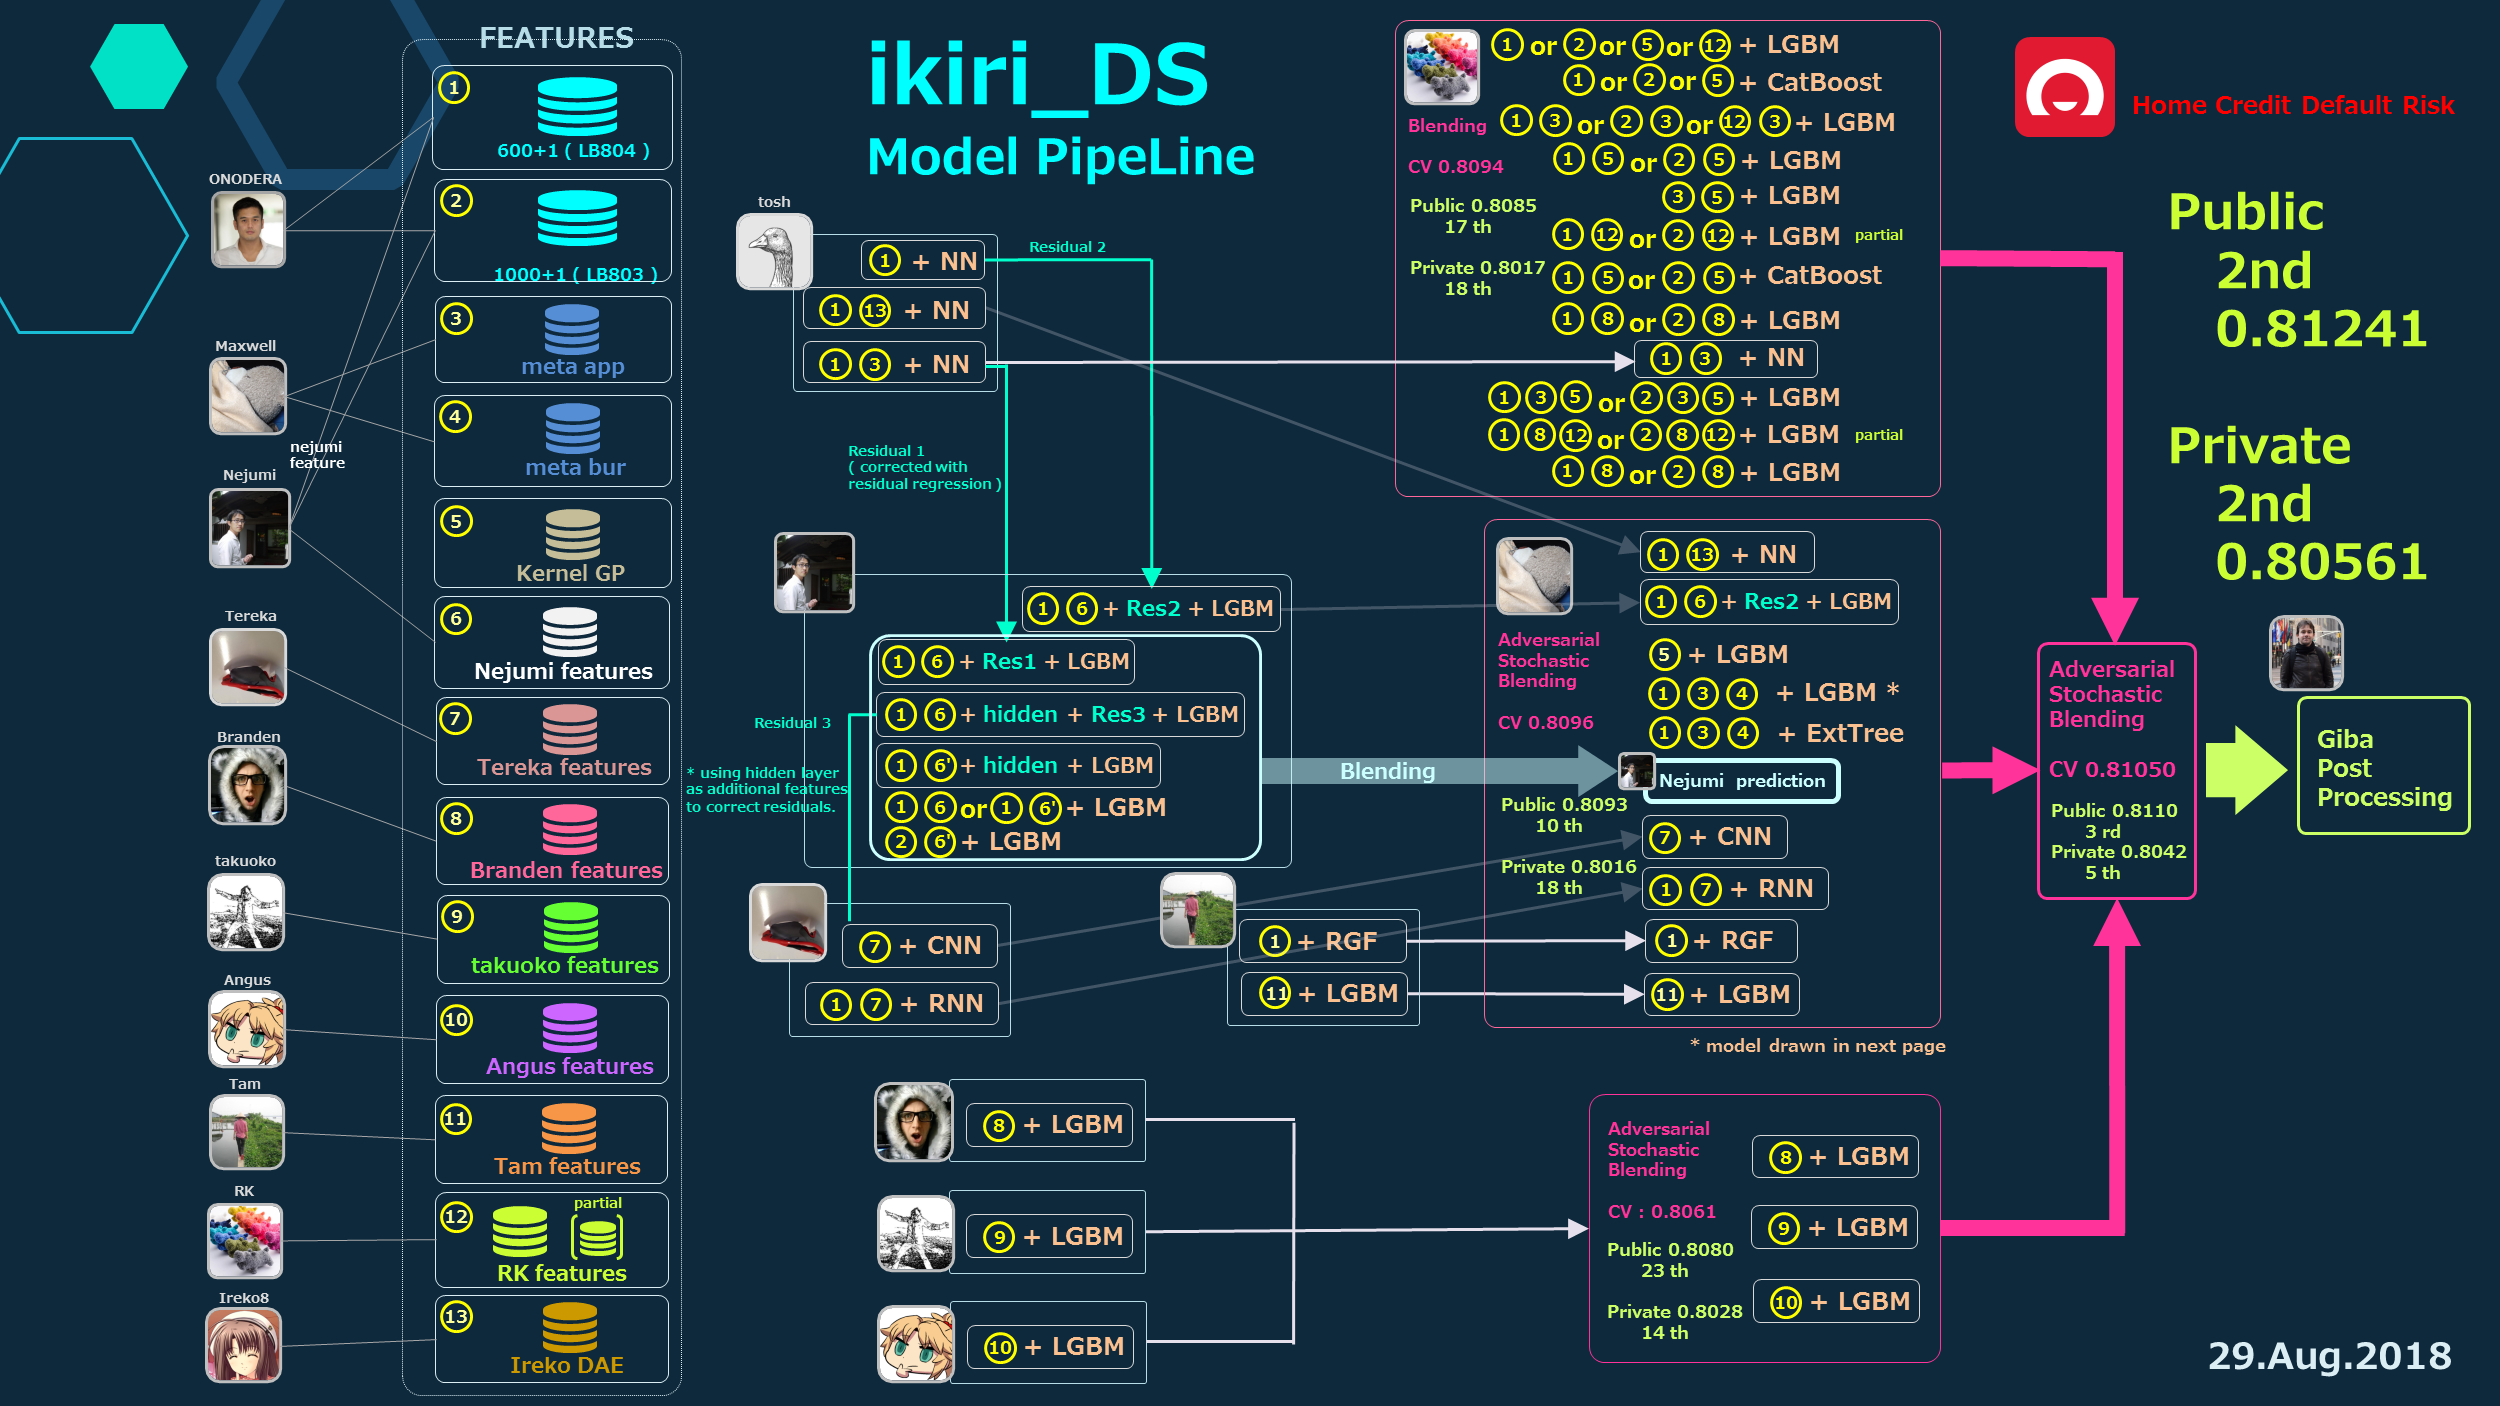

In [3]:
from IPython.display import Image
Image("model_structure_v8_blending.png")

### 9.*NOTE ON BEST MODEL FOLDER:*

* We only have final single model which uses LightGBM classifier. Run the notebooks each one by one

#### Preprocessing features

1. prev_training.ipynb (training on each previous application)
2. buro_training.ipynb (training on each bureau record)
3. month_training.ipynb (training on each monthly record)
4. house-doc-feats.ipynb (house and document features)
5. inst-ts.ipynb, bureau_balance-ts.ipynb, pos-ts.ipynb, creditcardbl-ts.ipynb (time series features)


#### Single models
6. LightGBM_model.ipynb 

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.




### RESULTS:

* Single model for home credit default risk.
* Created features from main application table.
* Created features from supplementary tables (prev/bureau/installment/pos-cash/credit card), groupy by current ID and merge to main table.
* Read preprocessed features generated from other notebooks and merge to main table.
* Fitted LGBMClassifier and save results to disk for ensembling.
* We coudn't do more single models for ensembling techniques because we were running into memory issue.
* All intermediate and final outputs are saved in the output folder.
* We are saving our results and submitting according to the format given in the competition:
"test_pred_lgm_model.csv"

# 3. CONCLUSIONS

* We created only one single model for this assignment. It was not possible to create more models because of my system memory and high process time.
* The goal was to create 3 to 5 single models and use ensembling techniques to check if the score is improving.
* But to run single model with lightGBM after preprocessing each feature took around 8-10 hours.
* Memory issue in the system was also one of the mjor concerns. I had to delete the memory periodically to execute next code piece.
* I stopped my analysis after single model since it also gave me a decent rank on the Leaderboard.



# 4. CONTRIBUTION

By me : 30%

1. Tried to replicate the code of one data csv to the other data csv as part of feature engineering

By External Source (Kaggle, Top rankers blogs) : 70%

# 5. CITATION

Data set is taken from the kaggle website : https://www.kaggle.com/c/home-credit-default-risk/data

#### Top Public kernels considered for the analysis

1. https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
2. https://www.kaggle.com/jsaguiar/lightgbm-with-simple-features
3. https://www.kaggle.com/codename007/home-credit-complete-eda-feature-importance
4. https://www.kaggle.com/ogrellier/feature-selection-with-null-importances
5. https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda

Thanks all fellow kagglers for helpful discussions and wonderful ideas.

#### Top rankers blogs and interviews

1. https://www.youtube.com/watch?v=7665INW4I5g
2. https://www.youtube.com/watch?v=9Vk1rXLhG48
3. https://www.kaggle.com/c/home-credit-default-risk/discussion/64821
4. https://www.kaggle.com/ogrellier
5. https://www.kaggle.com/scirpus
6. https://neptune.ml/

#### Other sources

1. https://clinthoward.github.io/portfolio/2018/05/26/Home-Credit-Data/


# 6. COPYRIGHT

Copyright 2019 Monisha Vodnala

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.